In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree
import pydotplus


import plotly.express as px
import scipy.stats as stats
import matplotlib.image as pltimg


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from numpy.lib.function_base import average
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio


In [41]:
rawdataurl = 'https://raw.githubusercontent.com/dfgbrooklyn24/Team-4/main/2023-2024%20Enrollment%20%26%20Demographics.csv?token=GHSAT0AAAAAACQ2CRQSE5R54C3XOPNFEGBSZRDZLZA'
enrolldemo_df = pd.read_csv(rawdataurl)

HTTPError: HTTP Error 404: Not Found

In [42]:
enrolldemo_df.head()

,SchoolYear,Sector,SubSector,ulcscode,SchoolName,LearningNetwork,GradeLevel,StudentEnrollment,ELCount,ELPCT,...,BlackAfricanAmericanPCT,HispanicCount,HispanicPCT,MultiRaceCount,MultiRacePCT,PacificIslanderCount,PacificIslanderPCT,WhiteCount,WhitePCT,CEPEconomicallyDisadvantagedRate
0,2023-2024,District,District,1010,John Bartram High School,Network 13,09,158,24.0,15.19,...,76.58,25,15.82,6,3.80,0,0.0,0,0.00,NaN
1,2023-2024,District,District,1010,John Bartram High School,Network 13,10,145,40.0,27.59,...,71.03,33,22.76,5,3.45,0,0.0,0,0.00,NaN
2,2023-2024,District,District,1010,John Bartram High School,Network 13,11,111,23.0,20.72,...,81.98,11,9.91,4,3.60,0,0.0,1,0.90,NaN
3,2023-2024,District,District,1010,John Bartram High School,Network 13,12,112,27.0,24.11,...,80.36,17,15.18,1,0.89,0,0.0,0,0.00,NaN
4,2023-2024,District,District,1010,John Bartram High School,Network 13,All Grades,526,114.0,21.67,...,77.00,86,16.35,16,3.04,0,0.0,1,0.19,100.0


In [43]:
enrolldemo_df.describe()

,ulcscode,StudentEnrollment,ELCount,ELPCT,NotELCount,NotELPCT,IEPCount,IEPPCT,NotIEPCount,NotIEPPCT,...,BlackAfricanAmericanPCT,HispanicCount,HispanicPCT,MultiRaceCount,MultiRacePCT,PacificIslanderCount,PacificIslanderPCT,WhiteCount,WhitePCT,CEPEconomicallyDisadvantagedRate
count,2633.000000,2633.000000,1869.000000,1869.000000,1869.000000,1869.000000,2633.000000,2633.000000,2633.000000,2633.000000,...,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,248.000000
mean,4605.273073,136.903912,24.803638,13.542713,99.449973,86.457400,25.624763,20.102457,111.279149,79.897649,...,57.970585,32.866692,21.229905,5.996962,4.016863,0.170908,0.100125,18.919863,11.170642,89.020363
std,2151.007602,225.084733,73.061277,15.343807,155.169225,15.343831,42.432761,12.451646,189.087904,12.451650,...,32.870965,83.527829,23.313020,13.196867,4.096841,0.678897,0.402004,60.455207,16.945362,26.970625
min,1010.000000,1.000000,0.000000,0.000000,1.000000,18.330000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3318.000000,41.000000,1.000000,1.520000,31.000000,78.180000,7.000000,12.200000,33.000000,73.760000,...,26.190000,2.000000,3.850000,1.000000,1.060000,0.000000,0.000000,0.000000,0.000000,99.952500
50%,3446.000000,71.000000,4.000000,7.320000,48.000000,92.680000,13.000000,19.210000,57.000000,80.790000,...,63.440000,9.000000,11.110000,2.000000,3.170000,0.000000,0.000000,2.000000,2.700000,100.000000
75%,6340.000000,116.000000,18.000000,21.820000,85.000000,98.480000,25.000000,26.240000,95.000000,87.800000,...,90.570000,28.000000,32.730000,6.000000,5.840000,0.000000,0.000000,13.000000,15.000000,100.000000
max,8900.000000,3271.000000,1133.000000,81.670000,2224.000000,100.000000,533.000000,100.000000,2950.000000,100.000000,...,100.000000,1490.000000,100.000000,204.000000,58.330000,16.000000,5.880000,846.000000,90.910000,100.000000


In [ ]:
rawdataurl2 = 'https://raw.githubusercontent.com/dfgbrooklyn24/Team-4/main/2023-2024%20Master%20School%20List%20(20231003).csv?token=GHSAT0AAAAAACQ2CRQSZF45FX5BRYHEOHR2ZRDZMUQ'
schoollist_df = pd.read_csv(rawdataurl2)

In [44]:
schoollist_df.head()

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,0,0,0,0,1,1,1,1
1,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,0,0,0,0,1,1,1,1
2,7903.0,392779,4.218990e+11,126515001.0,1030,103,HIGH SCHOOL OF THE FUTURE,High School of the Future,High School of the Future,HS of Future,...,0,0,0,0,0,0,1,1,1,1
3,7780.0,393347,4.218990e+11,126515001.0,1050,105,PAUL ROBESON HIGH SCHOOL,Paul Robeson High School for Human Services,"Robeson, Paul High School for Human Services",Robeson,...,0,0,0,0,0,0,1,1,1,1
4,7245.0,393944,4.218990e+11,126515001.0,1100,110,SAYRE HIGH SCHOOL,William L. Sayre High School,"Sayre, William L. High School",Sayre,...,0,0,0,0,0,0,1,1,1,1


In [45]:
schoollist_df.describe()

,PA Code,NCES Code,AUN Code,ULCS Code,Year Opened,Grade Span at Scale,Phasing-In,Phasing-Out,Title I Designation,Federal Accountability Designation,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
count,303.000000,2.980000e+02,3.280000e+02,329.000000,329.000000,0.0,0.0,0.0,298.0,0.0,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,6076.118812,4.213943e+11,1.277219e+08,4754.306991,1972.103343,NaN,NaN,NaN,1.0,NaN,...,0.644377,0.641337,0.662614,0.583587,0.577508,0.580547,0.340426,0.337386,0.334347,0.337386
std,1941.069547,8.277143e+08,1.301580e+07,2216.727903,37.783340,NaN,NaN,NaN,0.0,NaN,...,0.479431,0.480338,0.473538,0.493715,0.494708,0.494221,0.474574,0.473538,0.472480,0.473538
min,3601.000000,4.200010e+11,1.005100e+08,1010.000000,1889.000000,NaN,NaN,NaN,1.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3769.500000,4.200892e+11,1.265150e+08,3318.000000,1937.000000,NaN,NaN,NaN,1.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6996.000000,4.218990e+11,1.265150e+08,4280.000000,1971.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7814.000000,4.218990e+11,1.265150e+08,6450.000000,2006.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8508.000000,4.218990e+11,3.265107e+08,8900.000000,2023.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
rawdataurl3 = 'https://raw.githubusercontent.com/dfgbrooklyn24/Team-4/main/Nonprofit_Data_PA.csv?token=GHSAT0AAAAAACQ2CRQSZAOB2Y3T2P5NWH72ZRDZNQQ'
nonprofit_df = pd.read_csv(rawdataurl3)

In [46]:
nonprofit_df.describe()

,zip,est
count,1386.000000,1386.000000
mean,17442.222222,12.716450
std,1465.148055,12.981786
min,15001.000000,3.000000
25%,16128.750000,4.000000
50%,17519.500000,8.000000
75%,19001.000000,17.000000
max,19611.000000,158.000000


In [ ]:
rawdataurl4 = "https://raw.githubusercontent.com/dfgbrooklyn24/Team-4/main/SDP_College_Matriculation_2021-2022.csv?token=GHSAT0AAAAAACQ2CRQSJGGWY5UIM676I5KWZRDZOCA"
collegematric_df = pd.read_csv(rawdataurl4)

In [47]:
collegematric_df.head()

,School Year,ULCS Code,School Name,Number of Graduates,First-Fall Matriculation Rate
0,2021-2022,1010,John Bartram High School,120,25.83
1,2021-2022,1020,West Philadelphia High School,81,35.80
2,2021-2022,1030,High School of the Future,133,35.34
3,2021-2022,1050,Paul Robeson High School for Human Services,79,39.24
4,2021-2022,1100,William L. Sayre High School,85,23.53


In [ ]:
collegematric_df.describe()

In [48]:
rawdataurl5 = "https://raw.githubusercontent.com/dfgbrooklyn24/Team-4/main/Student_ADA_Yearly.csv?token=GHSAT0AAAAAACQ2CRQT5YRFJCMO5QYJZFV6ZRDZOVA"
d_attendance_df = pd.read_csv(rawdataurl5)


In [49]:
d_attendance_df.head()

,School Year,Sector,ULCS Code,School Name,Average Daily Attendance (YTD)
0,2022-2023,District,1010,John Bartram High School,77.27
1,2022-2023,District,1020,West Philadelphia High School,80.34
2,2022-2023,District,1030,High School of the Future,84.49
3,2022-2023,District,1050,Paul Robeson High School for Human Services,91.50
4,2022-2023,District,1100,William L. Sayre High School,82.52


In [50]:
d_attendance_df.describe()

,ULCS Code,Average Daily Attendance (YTD)
count,642.000000,642.000000
mean,5079.205607,88.227040
std,2346.420215,5.460474
min,1010.000000,68.850000
25%,2590.000000,84.770000
50%,5415.000000,88.870000
75%,7220.000000,92.070000
max,8770.000000,99.440000


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
graduationrate_df = pd.read_csv('/content/drive/MyDrive/Datasets/SDP_Graduation_Rates_School_S_2023-02-15.csv')

In [53]:
graduationrate_df.describe()

,schoolid_ulcs,denom
count,26163.000000,26163.000000
mean,4994.525781,57.887628
std,2397.322578,78.109823
min,1010.000000,1.000000
25%,3170.000000,6.000000
50%,5080.000000,32.000000
75%,7010.000000,82.000000
max,8891.000000,950.000000


In [54]:
graduationrate_df.head()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
0,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,All Students,All Students,281,203,72.24
1,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Economically Disadvantaged,211,153,72.51
2,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,Economically Disadvantaged,Not Economically Disadvantaged,70,50,71.43
3,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,EL,37,24,64.86
4,2010-2011,1010,John Bartram High School,District,4-Year Graduation Rate,ELL,Non-EL,244,179,73.36


In [55]:
graduationrate_df.tail()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
26158,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Ethnicity,White,1,s,s
26159,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Female,16,s,s
26160,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,Gender,Male,5,s,s
26161,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,18,s,s
26162,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Has IEP,3,s,s


Master School List & Daily Attendence

In [56]:
master_school_df = schoollist_df

In [57]:
master_school_df.head()

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,0,0,0,0,1,1,1,1
1,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,0,0,0,0,1,1,1,1
2,7903.0,392779,4.218990e+11,126515001.0,1030,103,HIGH SCHOOL OF THE FUTURE,High School of the Future,High School of the Future,HS of Future,...,0,0,0,0,0,0,1,1,1,1
3,7780.0,393347,4.218990e+11,126515001.0,1050,105,PAUL ROBESON HIGH SCHOOL,Paul Robeson High School for Human Services,"Robeson, Paul High School for Human Services",Robeson,...,0,0,0,0,0,0,1,1,1,1
4,7245.0,393944,4.218990e+11,126515001.0,1100,110,SAYRE HIGH SCHOOL,William L. Sayre High School,"Sayre, William L. High School",Sayre,...,0,0,0,0,0,0,1,1,1,1


In [58]:
master_school_df.describe()

,PA Code,NCES Code,AUN Code,ULCS Code,Year Opened,Grade Span at Scale,Phasing-In,Phasing-Out,Title I Designation,Federal Accountability Designation,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
count,303.000000,2.980000e+02,3.280000e+02,329.000000,329.000000,0.0,0.0,0.0,298.0,0.0,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,6076.118812,4.213943e+11,1.277219e+08,4754.306991,1972.103343,NaN,NaN,NaN,1.0,NaN,...,0.644377,0.641337,0.662614,0.583587,0.577508,0.580547,0.340426,0.337386,0.334347,0.337386
std,1941.069547,8.277143e+08,1.301580e+07,2216.727903,37.783340,NaN,NaN,NaN,0.0,NaN,...,0.479431,0.480338,0.473538,0.493715,0.494708,0.494221,0.474574,0.473538,0.472480,0.473538
min,3601.000000,4.200010e+11,1.005100e+08,1010.000000,1889.000000,NaN,NaN,NaN,1.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3769.500000,4.200892e+11,1.265150e+08,3318.000000,1937.000000,NaN,NaN,NaN,1.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6996.000000,4.218990e+11,1.265150e+08,4280.000000,1971.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7814.000000,4.218990e+11,1.265150e+08,6450.000000,2006.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8508.000000,4.218990e+11,3.265107e+08,8900.000000,2023.000000,NaN,NaN,NaN,1.0,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
d_attendance_df.columns

Index(['School Year', 'Sector', 'ULCS Code', 'School Name',
       'Average Daily Attendance (YTD)'],
      dtype='object')

In [60]:
master_school_df.columns

Index(['PA Code', 'NSC Code', 'NCES Code', 'AUN Code', 'ULCS Code',
       'SRC School ID', 'School Name (ULCS)', 'Publication Name',
       'Publication Name Alpha List', 'Abbreviated Name', 'Year Opened',
       'School Level', 'Admission Type', 'Current Grade Span Served',
       'Grade Span at Scale', 'Phasing-In', 'Phasing-Out', 'Governance',
       'Management Organization', 'School Reporting Category',
       'Alternate Education Type', 'Major Intervention',
       'Major Intervention Year', 'Community School Cohort', 'CTE Status',
       'Title I Designation', 'Federal Accountability Designation',
       'City Council District', 'GPS Location', 'Multiple Addresses',
       'Street Address', 'City', 'State', 'Zip Code', 'Phone Number',
       'Fax Number', 'Website', 'School Leader Name', 'Learning Network',
       'Assistant Superintendent', 'FACE Liaison Name', 'FACE Liaison Email',
       'FACE Liaison Phone Number', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3',
       'Grade 4

In [61]:
master_school_df.columns

Index(['PA Code', 'NSC Code', 'NCES Code', 'AUN Code', 'ULCS Code',
       'SRC School ID', 'School Name (ULCS)', 'Publication Name',
       'Publication Name Alpha List', 'Abbreviated Name', 'Year Opened',
       'School Level', 'Admission Type', 'Current Grade Span Served',
       'Grade Span at Scale', 'Phasing-In', 'Phasing-Out', 'Governance',
       'Management Organization', 'School Reporting Category',
       'Alternate Education Type', 'Major Intervention',
       'Major Intervention Year', 'Community School Cohort', 'CTE Status',
       'Title I Designation', 'Federal Accountability Designation',
       'City Council District', 'GPS Location', 'Multiple Addresses',
       'Street Address', 'City', 'State', 'Zip Code', 'Phone Number',
       'Fax Number', 'Website', 'School Leader Name', 'Learning Network',
       'Assistant Superintendent', 'FACE Liaison Name', 'FACE Liaison Email',
       'FACE Liaison Phone Number', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3',
       'Grade 4

In [62]:
merged_df = pd.merge(master_school_df, d_attendance_df, on='ULCS Code', how='inner')


In [63]:
merged_df.head()

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,School Year,Sector,School Name,Average Daily Attendance (YTD)
0,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,1,1,1,1,2022-2023,District,John Bartram High School,77.27
1,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,1,1,1,1,2021-2022,District,John Bartram High School,76.70
2,3847.0,393345,4.218990e+11,126515001.0,1010,101,JOHN BARTRAM HIGH SCHOOL,John Bartram High School,"Bartram, John High School",Bartram,...,0,0,1,1,1,1,2020-2021,District,John Bartram High School,77.41
3,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,1,1,1,1,2022-2023,District,West Philadelphia High School,80.34
4,3860.0,393555,4.218990e+11,126515001.0,1020,102,WEST PHILADELPHIA HIGH SCHOOL,West Philadelphia High School,West Philadelphia High School,West Philadelphia,...,0,0,1,1,1,1,2021-2022,District,West Philadelphia High School,85.87


In [64]:
merged_df.tail()

,PA Code,NSC Code,NCES Code,AUN Code,ULCS Code,SRC School ID,School Name (ULCS),Publication Name,Publication Name Alpha List,Abbreviated Name,...,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,School Year,Sector,School Name,Average Daily Attendance (YTD)
635,8328.0,393567,4.218990e+11,126515001.0,8560,856,THE WORKSHOP SCHOOL,The Workshop School,The Workshop School,The Workshop,...,0,0,1,1,1,1,2021-2022,District,The Workshop School,93.92
636,8328.0,393567,4.218990e+11,126515001.0,8560,856,THE WORKSHOP SCHOOL,The Workshop School,The Workshop School,The Workshop,...,0,0,1,1,1,1,2020-2021,District,The Workshop School,87.51
637,5041.0,NaN,4.218990e+11,126515001.0,8770,877,HANCOCK DEMONSTRATION SCHOOL,John Hancock Demonstration School,John Hancock Demonstration School,Hancock Demonstration,...,1,1,0,0,0,0,2022-2023,District,John Hancock Demonstration School,92.32
638,5041.0,NaN,4.218990e+11,126515001.0,8770,877,HANCOCK DEMONSTRATION SCHOOL,John Hancock Demonstration School,John Hancock Demonstration School,Hancock Demonstration,...,1,1,0,0,0,0,2021-2022,District,John Hancock Demonstration School,92.29
639,5041.0,NaN,4.218990e+11,126515001.0,8770,877,HANCOCK DEMONSTRATION SCHOOL,John Hancock Demonstration School,John Hancock Demonstration School,Hancock Demonstration,...,1,1,0,0,0,0,2020-2021,District,John Hancock Demonstration School,94.76


In [65]:
merged_df.columns

Index(['PA Code', 'NSC Code', 'NCES Code', 'AUN Code', 'ULCS Code',
       'SRC School ID', 'School Name (ULCS)', 'Publication Name',
       'Publication Name Alpha List', 'Abbreviated Name', 'Year Opened',
       'School Level', 'Admission Type', 'Current Grade Span Served',
       'Grade Span at Scale', 'Phasing-In', 'Phasing-Out', 'Governance',
       'Management Organization', 'School Reporting Category',
       'Alternate Education Type', 'Major Intervention',
       'Major Intervention Year', 'Community School Cohort', 'CTE Status',
       'Title I Designation', 'Federal Accountability Designation',
       'City Council District', 'GPS Location', 'Multiple Addresses',
       'Street Address', 'City', 'State', 'Zip Code', 'Phone Number',
       'Fax Number', 'Website', 'School Leader Name', 'Learning Network',
       'Assistant Superintendent', 'FACE Liaison Name', 'FACE Liaison Email',
       'FACE Liaison Phone Number', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3',
       'Grade 4

In [66]:
filtered_merged_df = merged_df[["Zip Code", "Average Daily Attendance (YTD)", "School Name","ULCS Code"]]

In [67]:
filtered_merged_df.tail()

,Zip Code,Average Daily Attendance (YTD),School Name,ULCS Code
635,19139,93.92,The Workshop School,8560
636,19139,87.51,The Workshop School,8560
637,19114,92.32,John Hancock Demonstration School,8770
638,19114,92.29,John Hancock Demonstration School,8770
639,19114,94.76,John Hancock Demonstration School,8770


In [68]:
average_attendance_by_zip = merged_df.groupby('Zip Code')['Average Daily Attendance (YTD)'].mean().reset_index()

average_attendance_by_zip.rename(columns={'Average Daily Attendance (YTD)': 'Average Attendance by Zip'}, inplace=True)

print(average_attendance_by_zip)

    Zip Code  Average Attendance by Zip
0      19103                  96.670000
1      19104                  90.433810
2      19106                  93.861667
3      19111                  91.097778
4      19114                  92.506667
5      19115                  95.637778
6      19116                  92.333333
7      19118                  93.033333
8      19119                  92.342222
9      19120                  89.480323
10     19121                  83.607333
11     19122                  85.442381
12     19123                  91.670833
13     19124                  85.216667
14     19125                  86.876190
15     19126                  89.598889
16     19127                  92.996667
17     19128                  90.347222
18     19129                  87.240000
19     19130                  89.431111
20     19131                  85.968000
21     19132                  82.802000
22     19133                  83.837222
23     19134                  86.159545


<ipython-input-69-f4fba5dec682>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Zip Code', y='Average Attendance by Zip', data=average_attendance_by_zip, palette='coolwarm')


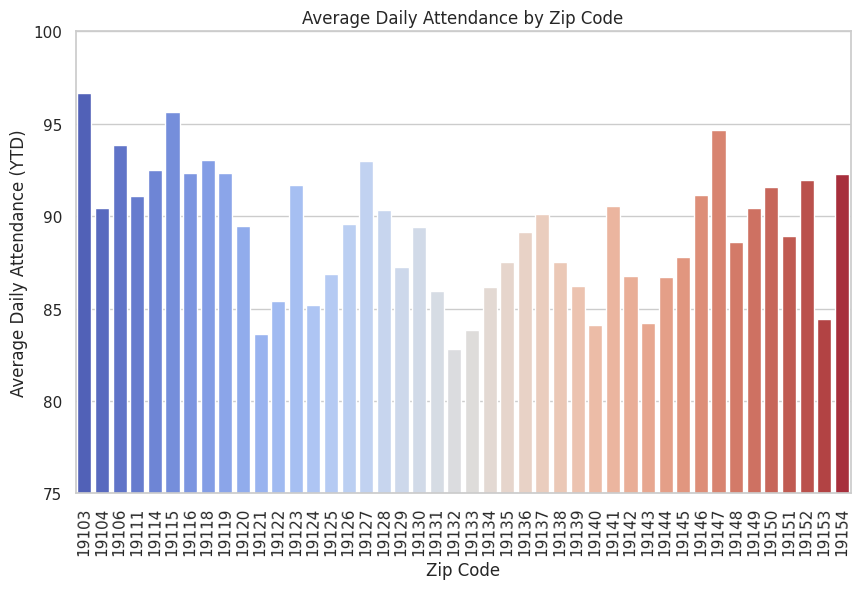

In [69]:
# Setting up the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Zip Code', y='Average Attendance by Zip', data=average_attendance_by_zip, palette='coolwarm')
plt.ylim(75, 100)


# Adding plot title and labels
plt.title('Average Daily Attendance by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Daily Attendance (YTD)')
plt.xticks(rotation = 89)
# Showing the plot
plt.show()


In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
X = filtered_merged_df[['Zip Code', 'Average Daily Attendance (YTD)']].copy()

In [72]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [73]:
sns.set()

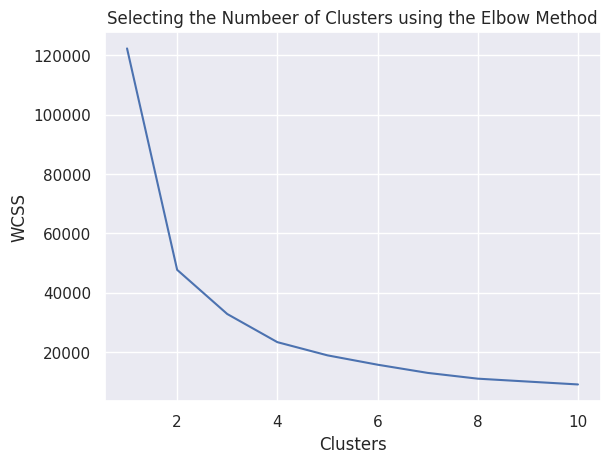

In [74]:
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
from sklearn.mixture import GaussianMixture

In [76]:
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=3)

In [79]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

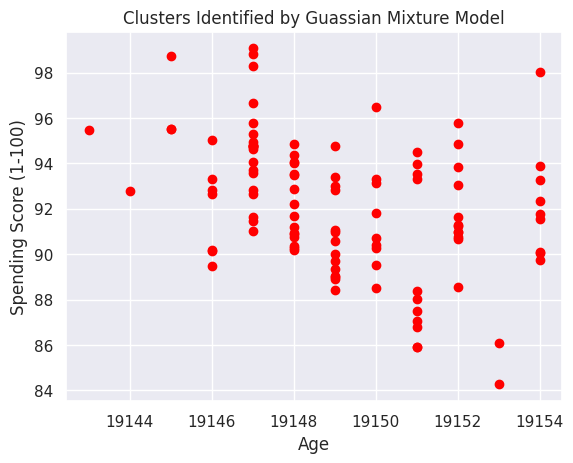

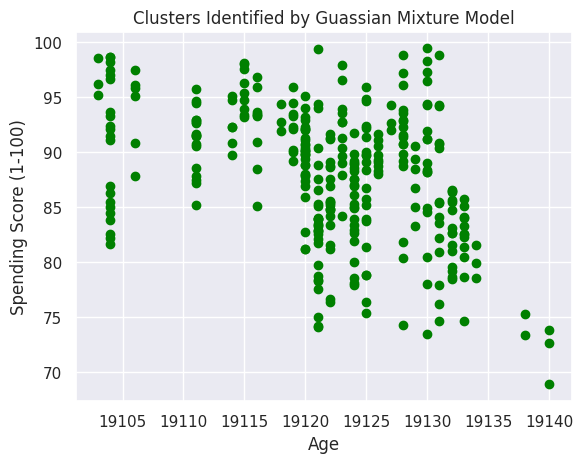

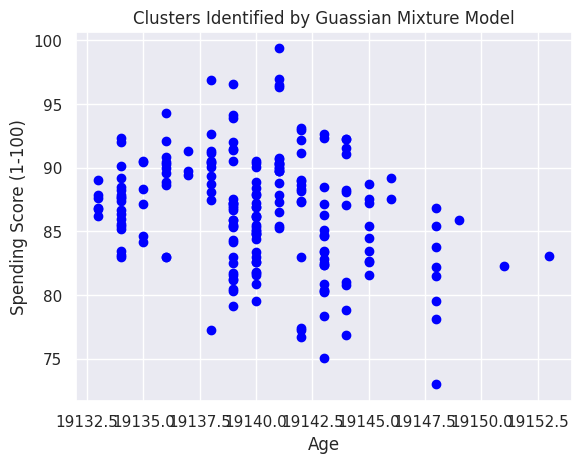

In [80]:
import matplotlib.pyplot as plt
color = ["red", "green", "blue"]

for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["Zip Code"],data["Average Daily Attendance (YTD)"], c=color[k])
    plt.title("Clusters Identified by Guassian Mixture Model")
    plt.ylabel("Spending Score (1-100)")
    plt.xlabel("Age")
    plt.show()

In [81]:
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)

In [82]:
from sklearn.cluster import SpectralClustering
spectral_cluster_model= SpectralClustering(
    n_clusters=5,
    random_state=25,
    n_neighbors=8,
    affinity='nearest_neighbors'
)

In [83]:
X['cluster'] = spectral_cluster_model.fit_predict(X[['Zip Code', 'Average Daily Attendance (YTD)']])


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[Text(0.5, 1.0, 'Spectral Clustering')]

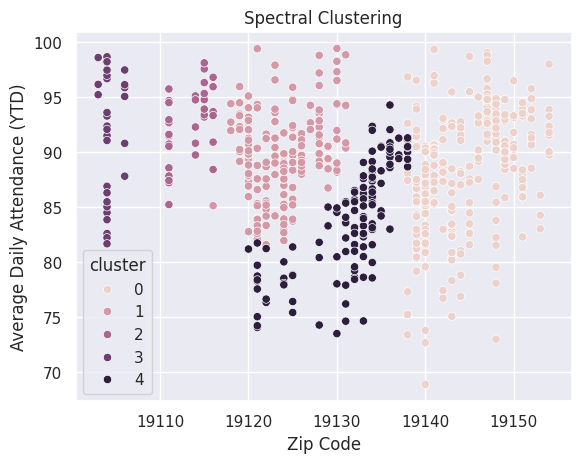

In [84]:
fig, ax = plt.subplots()
sns.scatterplot(x='Zip Code', y='Average Daily Attendance (YTD)', data=X, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering')

In [85]:
X = filtered_merged_df[['Zip Code']]  # Feature(s)
y = filtered_merged_df['Average Daily Attendance (YTD)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 21.727145178297


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Creating and training the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)


In [87]:
collegematric_df.columns

Index(['School Year', 'ULCS Code', 'School Name', 'Number of Graduates',
       'First-Fall Matriculation Rate'],
      dtype='object')

In [88]:
filtered_merged_df.columns

Index(['Zip Code', 'Average Daily Attendance (YTD)', 'School Name',
       'ULCS Code'],
      dtype='object')

In [89]:
combined_df = pd.merge(filtered_merged_df, collegematric_df, on=['ULCS Code', 'School Name'], how='inner',suffixes=('_master', '_college'))


In [90]:
#this df is 3 of the df combined below is the 3 listed
#SDP_College_Matriculation_2021-2022.csv
#2023-2024 Master School List (20231003).csv
#Student_ADA_Yearly.csv

In [91]:
combined_df.columns

Index(['Zip Code', 'Average Daily Attendance (YTD)', 'School Name',
       'ULCS Code', 'School Year', 'Number of Graduates',
       'First-Fall Matriculation Rate'],
      dtype='object')

In [ ]:
average_1st_fall_matric_by_zip = combined_df.groupby('Zip Code')['First-Fall Matriculation Rate'].mean().reset_index()

print(average_1st_fall_matric_by_zip)
#lowest surrounding the home zip is 19129 - 15.56&
#highest overall - 19141 -82.3%

<ipython-input-93-3e28402475b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Zip Code', y='First-Fall Matriculation Rate', data=average_1st_fall_matric_by_zip, palette='coolwarm')


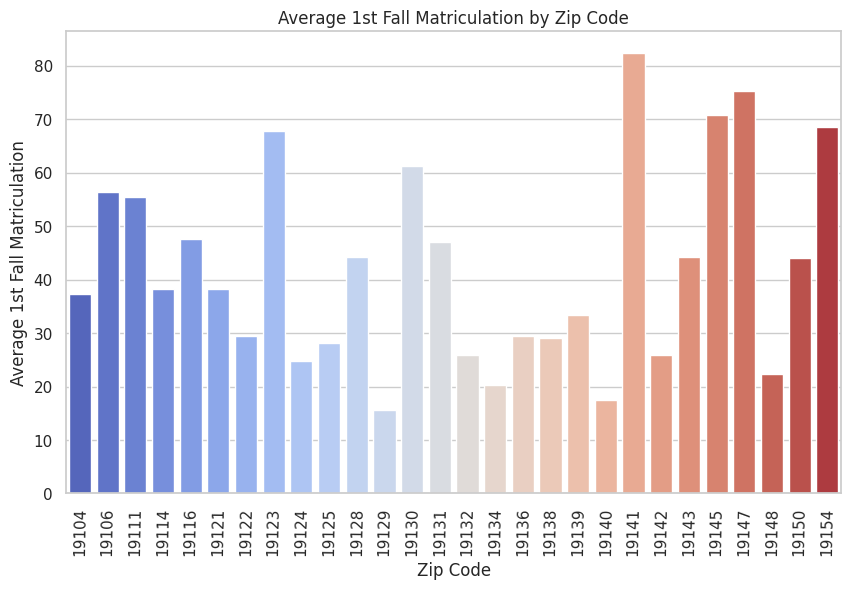

In [93]:
# Setting up the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Zip Code', y='First-Fall Matriculation Rate', data=average_1st_fall_matric_by_zip, palette='coolwarm')


# Adding plot title and labels
plt.title('Average 1st Fall Matriculation by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average 1st Fall Matriculation')
plt.xticks(rotation = 89)
# Showing the plot
plt.show()

In [94]:
average_attendance_by_zip2 = combined_df.groupby('Zip Code')['Average Daily Attendance (YTD)'].mean().reset_index()

average_attendance_by_zip2.rename(columns={'Average Daily Attendance (YTD)': 'Average Attendance by Zip'}, inplace=True)

print(average_attendance_by_zip)

    Zip Code  Average Attendance by Zip
0      19103                  96.670000
1      19104                  90.433810
2      19106                  93.861667
3      19111                  91.097778
4      19114                  92.506667
5      19115                  95.637778
6      19116                  92.333333
7      19118                  93.033333
8      19119                  92.342222
9      19120                  89.480323
10     19121                  83.607333
11     19122                  85.442381
12     19123                  91.670833
13     19124                  85.216667
14     19125                  86.876190
15     19126                  89.598889
16     19127                  92.996667
17     19128                  90.347222
18     19129                  87.240000
19     19130                  89.431111
20     19131                  85.968000
21     19132                  82.802000
22     19133                  83.837222
23     19134                  86.159545


In [96]:
sns.set(style="whitegrid")

# Creating a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Zip Code', y='Average Attendance by Zip', data=average_attendance_by_zip2, palette='coolwarm')
plt.ylim(75, 100)


# Adding plot title and labels
plt.title('Average Daily Attendance by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Daily Attendance (YTD)')
plt.xticks(rotation = 89)
# Showing the plot

plt.show()

In [97]:
combined_df.columns

Index(['Zip Code', 'Average Daily Attendance (YTD)', 'School Name',
       'ULCS Code', 'School Year', 'Number of Graduates',
       'First-Fall Matriculation Rate'],
      dtype='object')

In [98]:
#using multiple features to try and predict Sleep Disorder
feature_cols = ['Average Daily Attendance (YTD)',
       'ULCS Code', 'Number of Graduates',
       'First-Fall Matriculation Rate']
X = combined_df[feature_cols] #the features
y = combined_df['Zip Code'] #target

In [99]:
#split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [100]:
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train,y_train)

In [101]:
#your predictions
y_pred = clf.predict(X_test)

In [102]:
y_pred

array([19125, 19125, 19125, 19125, 19128, 19130, 19125, 19128, 19125,
       19128, 19130, 19125, 19143, 19128, 19130, 19130, 19141, 19125,
       19128, 19125, 19125, 19130, 19104, 19104, 19130, 19125, 19125,
       19121, 19131, 19125, 19106, 19128, 19121, 19128, 19128, 19128,
       19128, 19125, 19130, 19130, 19128, 19125, 19128, 19145, 19125,
       19130, 19128])

In [103]:
#this gives the probably of being 0 as the first element, and the probability of being 1 for the second
clf.predict_proba(X_test)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.10344828, ..., 0.        , 0.03448276,
        0.06896552]])

In [104]:
#to see how accurate your predictions were, use the true y's and the predicted y's
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3191489361702128


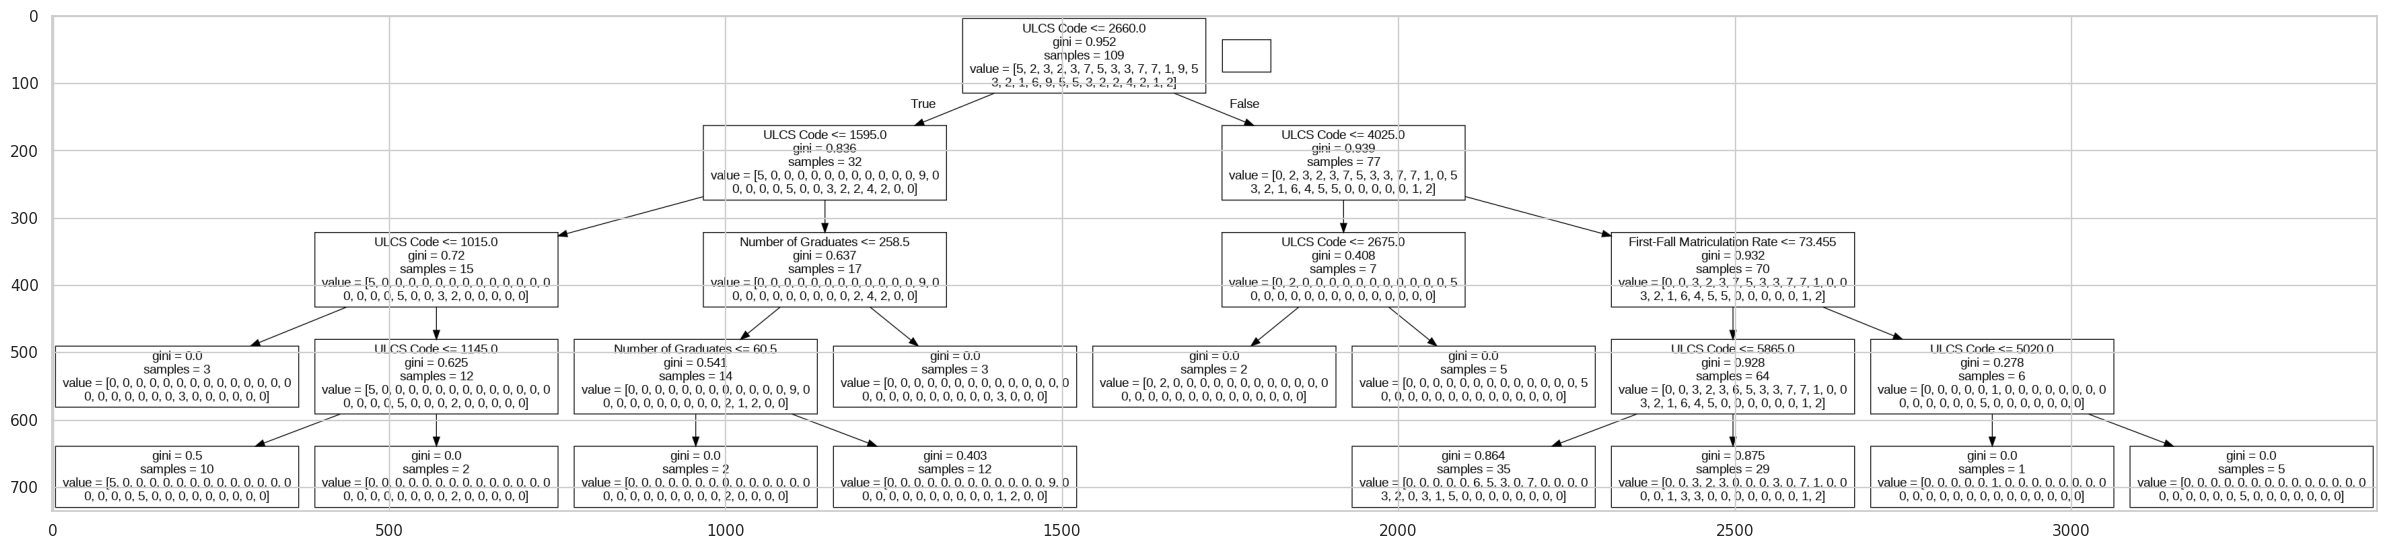

In [105]:
#this is just a way to get a glimpse at what the first few choices were
plt_2 = plt.figure(figsize=(30, 30))
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [106]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.19148936170212766


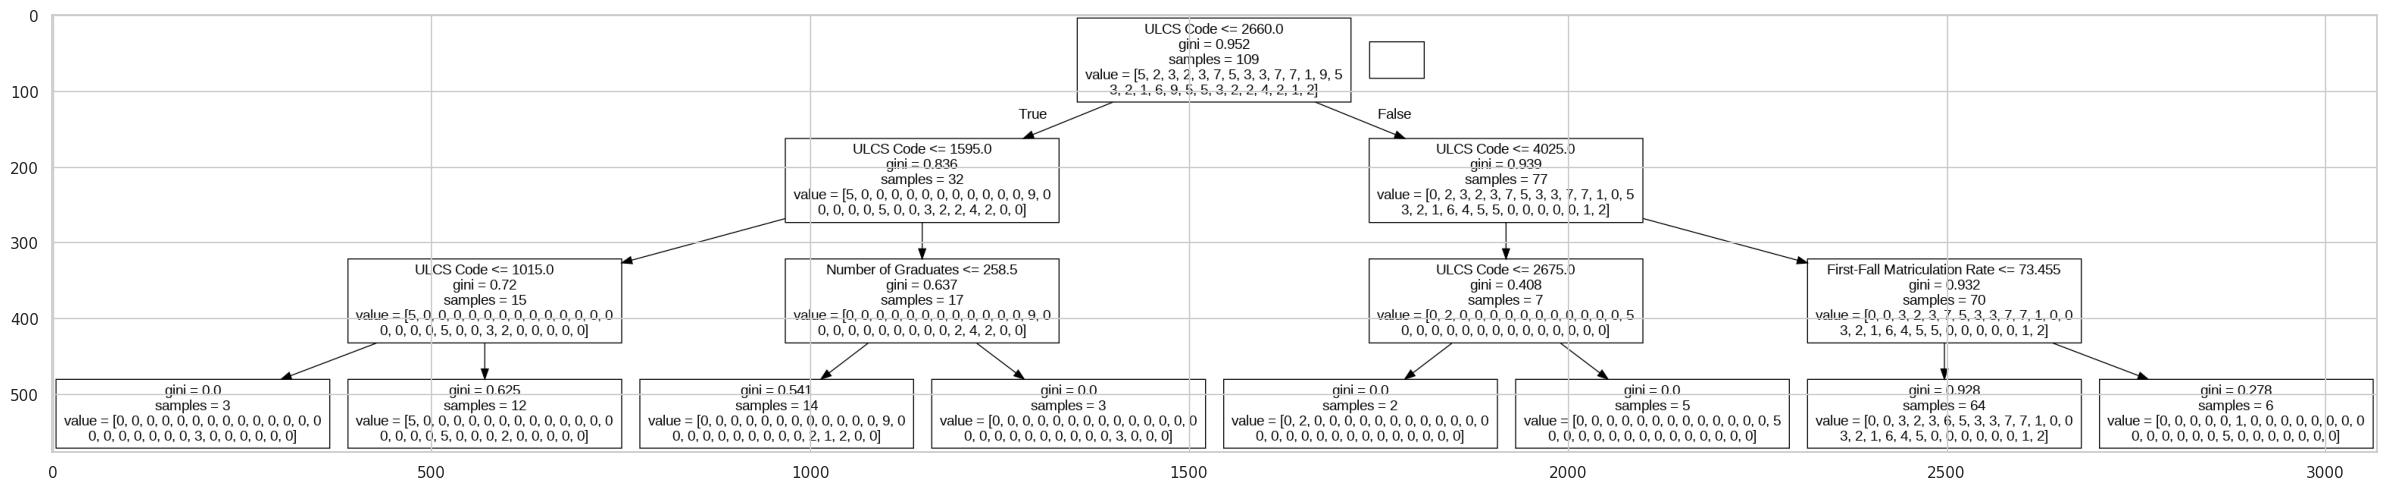

In [107]:
plt_2 = plt.figure(figsize=(30, 30))
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [108]:
importance = clf.feature_importances_

In [110]:
clf.feature_importances_

array([0.        , 0.73094237, 0.11762359, 0.15143404])

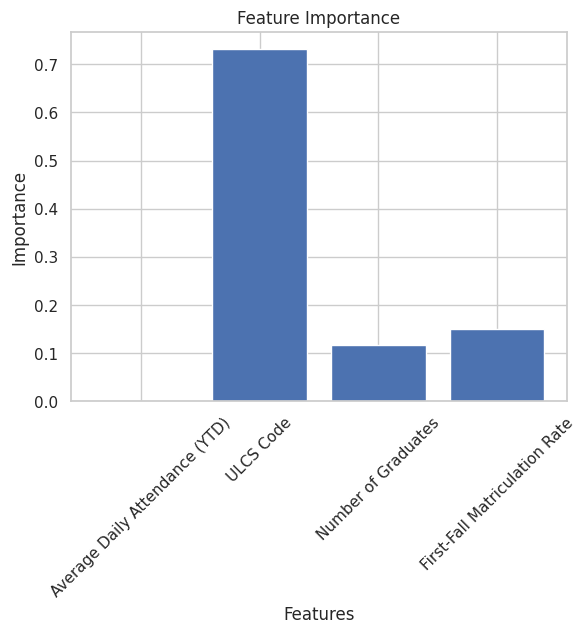

In [111]:
plt.bar(feature_cols, importance)
plt.xticks(rotation=45)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [112]:
combined_df

,Zip Code,Average Daily Attendance (YTD),School Name,ULCS Code,School Year,Number of Graduates,First-Fall Matriculation Rate
0,19142,77.27,John Bartram High School,1010,2021-2022,120,25.83
1,19142,76.70,John Bartram High School,1010,2021-2022,120,25.83
2,19142,77.41,John Bartram High School,1010,2021-2022,120,25.83
3,19139,80.34,West Philadelphia High School,1020,2021-2022,81,35.80
4,19139,85.87,West Philadelphia High School,1020,2021-2022,81,35.80
...,...,...,...,...,...,...,...
151,19114,90.81,Swenson Arts and Technology High School,8090,2021-2022,131,38.17
152,19114,95.12,Swenson Arts and Technology High School,8090,2021-2022,131,38.17
153,19139,94.16,The Workshop School,8560,2021-2022,42,35.71
154,19139,93.92,The Workshop School,8560,2021-2022,42,35.71


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


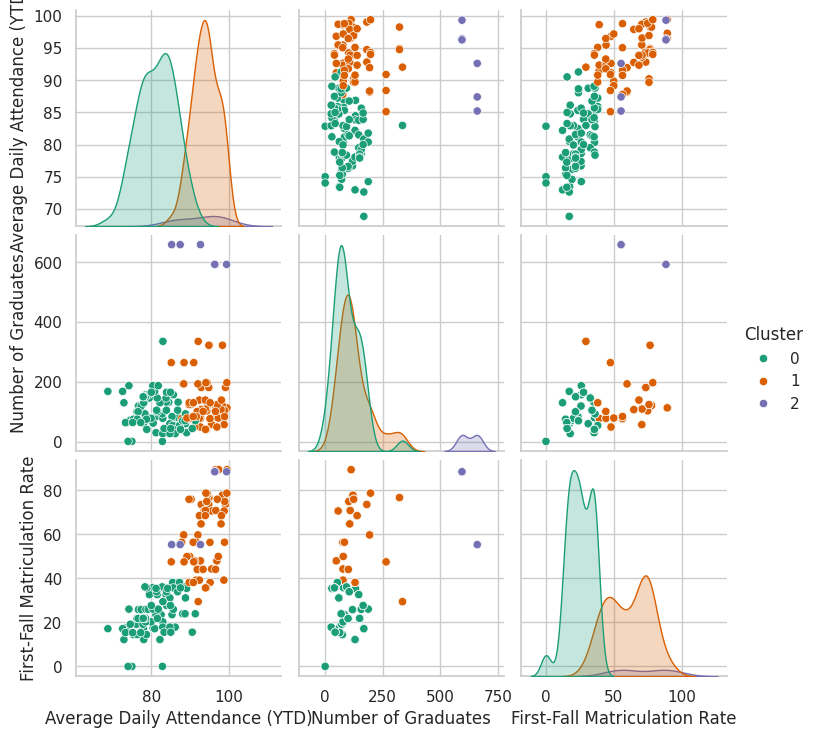

Cluster Centers:
   Average Daily Attendance (YTD)  Number of Graduates  \
0                       -0.767193            -0.283609   
1                        0.905606            -0.016403   
2                        0.779040             4.150965   

   First-Fall Matriculation Rate  
0                      -0.762835  
1                       0.849000  
2                       1.340682  


In [113]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame containing the data
# Extracting relevant columns
data = combined_df[['Zip Code', 'Average Daily Attendance (YTD)', 'School Name', 'ULCS Code', 'School Year', 'Number of Graduates', 'First-Fall Matriculation Rate']]

# Dropping rows with missing values
data.dropna(inplace=True)

# Selecting features for clustering
features = ['Average Daily Attendance (YTD)', 'Number of Graduates', 'First-Fall Matriculation Rate']

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Choosing the number of clusters (you can use techniques like the elbow method to find the optimal number of clusters)
k = 3

# Performing K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
sns.pairplot(data=data, hue='Cluster', palette='Dark2', diag_kind='kde', vars=features)
plt.show()

# Analyzing cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centers:")
print(cluster_centers)


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming combined_df is your DataFrame containing the data
# Extracting relevant columns
data = combined_df[['Zip Code', 'Average Daily Attendance (YTD)', 'School Name', 'ULCS Code', 'School Year', 'Number of Graduates', 'First-Fall Matriculation Rate']]

# Dropping rows with missing values
data.dropna(inplace=True)

# Selecting features and target variable
X = data[['Average Daily Attendance (YTD)', 'Number of Graduates', 'First-Fall Matriculation Rate']]
y = data['Zip Code']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Coefficients and Intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 164.68196648642683
R^2 Score: -0.101666756050101
Coefficients: [-0.08684343 -0.01203305  0.12069563]
Intercept: 19134.662989232293


In [115]:
d_attendance_df.columns

Index(['School Year', 'Sector', 'ULCS Code', 'School Name',
       'Average Daily Attendance (YTD)'],
      dtype='object')

In [116]:
d_attendance_df.describe()

,ULCS Code,Average Daily Attendance (YTD)
count,642.000000,642.000000
mean,5079.205607,88.227040
std,2346.420215,5.460474
min,1010.000000,68.850000
25%,2590.000000,84.770000
50%,5415.000000,88.870000
75%,7220.000000,92.070000
max,8770.000000,99.440000


LDA MODEL

In [117]:
#using "average dail attendance (YTD)" TO PREDICT ULCS CODE
#LDA MODEL
train = (d_attendance_df['Average Daily Attendance (YTD)'] < 100)
weekly_train = d_attendance_df.loc[train]
weekly_test = d_attendance_df.loc[~train]

In [118]:
y = d_attendance_df['ULCS Code']
y_train, y_test = y.loc[train], y.loc[~train]

In [119]:
weekly_train = weekly_train[['Average Daily Attendance (YTD)']]
weekly_test = weekly_test[['Average Daily Attendance (YTD)']]

In [120]:
lda = LDA(store_covariance=True)

In [121]:
lda.fit(weekly_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


LinearDiscriminantAnalysis(store_covariance=True)

In [122]:
# Check the shape of the weekly_test DataFrame
print(weekly_test.shape)

# Check the number of rows in the weekly_test DataFrame
print(len(weekly_test))

# Check if the weekly_test DataFrame is empty
print(weekly_test.empty)

#LDA WOULD NOT BE USEFUL HERE

(0, 1)
0
True


In [123]:
combined_df.columns

Index(['Zip Code', 'Average Daily Attendance (YTD)', 'School Name',
       'ULCS Code', 'School Year', 'Number of Graduates',
       'First-Fall Matriculation Rate'],
      dtype='object')

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


X = combined_df[['Average Daily Attendance (YTD)', 'Number of Graduates', 'Zip Code']]
y = combined_df['First-Fall Matriculation Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('zip_code', OneHotEncoder(), ['Zip Code'])
    ],
    remainder='passthrough'
)

linear_reg_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 91.67174183496351
R-squared (R2) Score: 0.8003468444368764


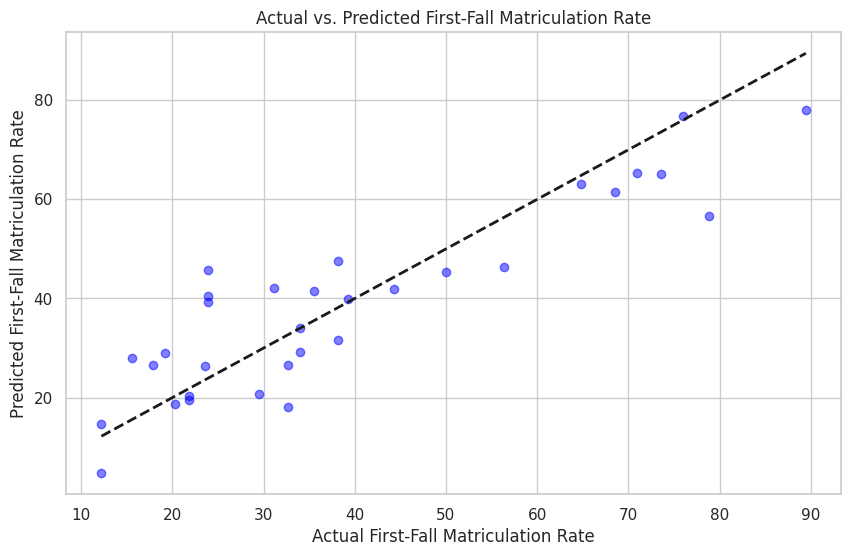

In [125]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual First-Fall Matriculation Rate')
plt.ylabel('Predicted First-Fall Matriculation Rate')
plt.title('Actual vs. Predicted First-Fall Matriculation Rate')
plt.grid(True)
plt.show()


In [126]:
combined_df

,Zip Code,Average Daily Attendance (YTD),School Name,ULCS Code,School Year,Number of Graduates,First-Fall Matriculation Rate
0,19142,77.27,John Bartram High School,1010,2021-2022,120,25.83
1,19142,76.70,John Bartram High School,1010,2021-2022,120,25.83
2,19142,77.41,John Bartram High School,1010,2021-2022,120,25.83
3,19139,80.34,West Philadelphia High School,1020,2021-2022,81,35.80
4,19139,85.87,West Philadelphia High School,1020,2021-2022,81,35.80
...,...,...,...,...,...,...,...
151,19114,90.81,Swenson Arts and Technology High School,8090,2021-2022,131,38.17
152,19114,95.12,Swenson Arts and Technology High School,8090,2021-2022,131,38.17
153,19139,94.16,The Workshop School,8560,2021-2022,42,35.71
154,19139,93.92,The Workshop School,8560,2021-2022,42,35.71


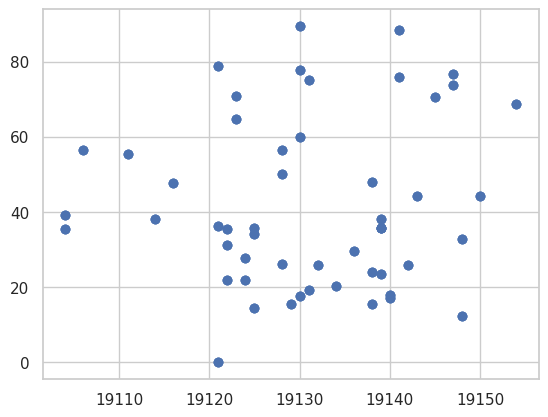

In [128]:
x = combined_df["Zip Code"]
y = combined_df["First-Fall Matriculation Rate"]
plt.scatter(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

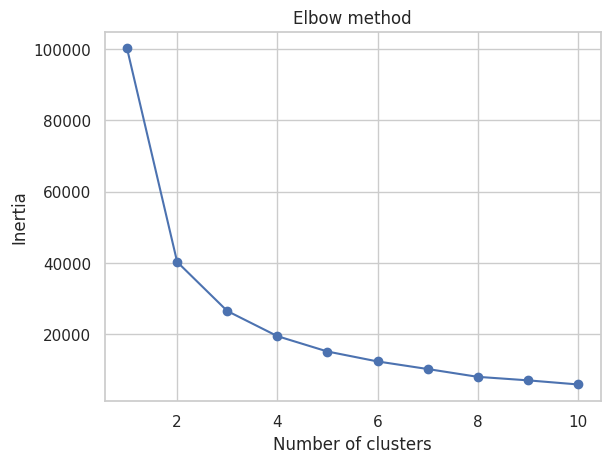

In [129]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


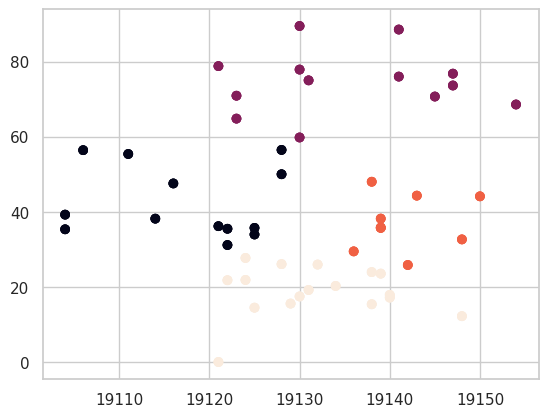

In [136]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c= kmeans.labels_)
plt.show()